# Тест №3: Геострофический баланс

In [5]:
%load_ext autoreload
%autoreload 2

from state import State
from domain import Domain
from swe_operators import SweAdvectiveFormOperator, SweVecInvFormOperator
from time_schemes import rk4, explicit_euler
from initial_conditions import gaussian_hill, barotropic_instability, geostrophic_balance
import operators as op
from vizualization import trisurf_field, animate_trisurf, surf_interpolated_field, animate_interpolated_surf, \
                          animate_tripcolor, tripcolor_field, imshow_interpolated_field

import numpy as np
import matplotlib.pyplot as plt
from vecmath import calc_mass, calc_l2_norm, calc_c_norm
from matplotlib           import animation
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# definition of computational domain constants
RADZ = 6371.22 * 1000.0 # "Earth" radii in meters
GRAV = 9.80616 # "Earth" gravity acceleration in m * s**(-2)
OMEGA = 7.292 * 10**(-5) # "Earth" angular velocity in rad * s**(-1)
PCORI = 2 * OMEGA # Coriolis parameter
H_MEAN = 10 * 1000.0 # "Earth" mean atmosphere depth
C_GRAV = np.sqrt(GRAV * H_MEAN) # Gravity wave speed
LX = 2 * np.pi * RADZ # domain size [0, LX] x [0, LY]
LY = 2 * np.pi * RADZ # domain size [0, LX] x [0, LY]

In [18]:
%%time
import time
from IPython.display import display, clear_output

domains = [Domain(xs = 0.0,    xe = LX / 2, nx = 32 * 2, ys = 0.0, ye = LY, ny = 64,  lx=LX, ly=LY), \
           Domain(xs = LX / 2, xe = LX    , nx = 32, ys = 0.0, ye = LY, ny = 64,  lx=LX, ly=LY)]

state21 = geostrophic_balance(domains, pcori=PCORI, g=GRAV, h_mean=H_MEAN)
state42 = geostrophic_balance(domains, pcori=PCORI, g=GRAV, h_mean=H_MEAN)
swe_operator21 = SweVecInvFormOperator(g=GRAV, pcori=PCORI, diff_method = op.diff_sbp21)
swe_operator42 = SweVecInvFormOperator(g=GRAV, pcori=PCORI, diff_method = op.diff_sbp42)

T = 5 * 24 * 3600
Nt = 4 * 150
dt = T / Nt

states_list21 = [state21]
states_list42 = [state42]

for k in range(Nt+1):
    clear_output(wait=True)
    display('Time step '+str(k))
    state21 = rk4(state21, swe_operator21, dt, domains)
    state42 = rk4(state42, swe_operator42, dt, domains)
    states_list21.append(state21)
    states_list42.append(state42)
h_list21 = [state21.h for state21 in states_list21]
h_list42 = [state42.h for state42 in states_list42]

'Time step 600'

CPU times: user 21.4 s, sys: 2.23 s, total: 23.6 s
Wall time: 23.2 s


<IPython.core.display.Javascript object>


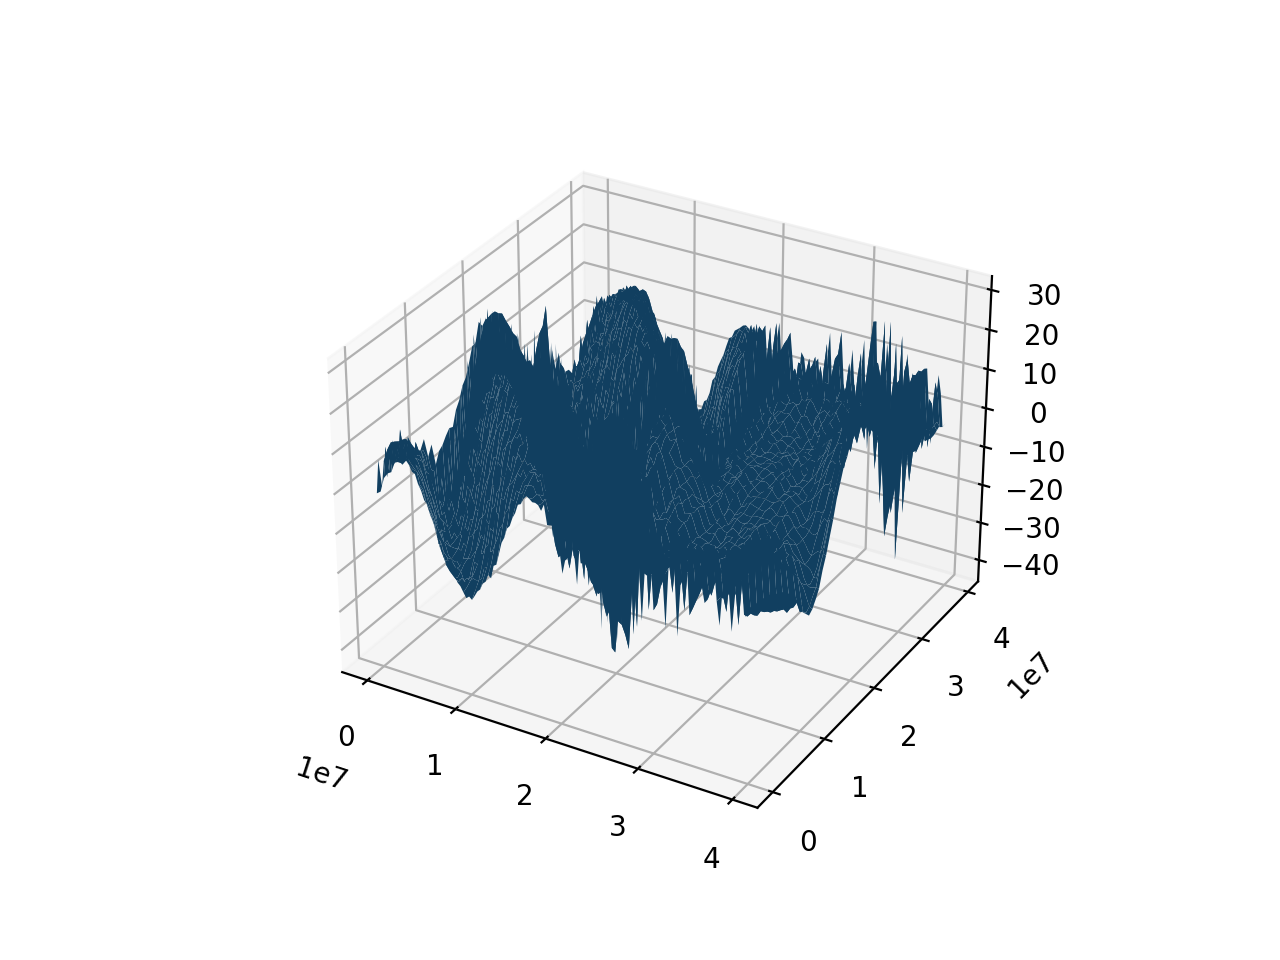

In [20]:
surf_interpolated_field(states_list21[-1].h - states_list21[0].h, domains)
plt.savefig('./imag/sbp21_geostrophic_balance_32x64_64x64.png')

<IPython.core.display.Javascript object>


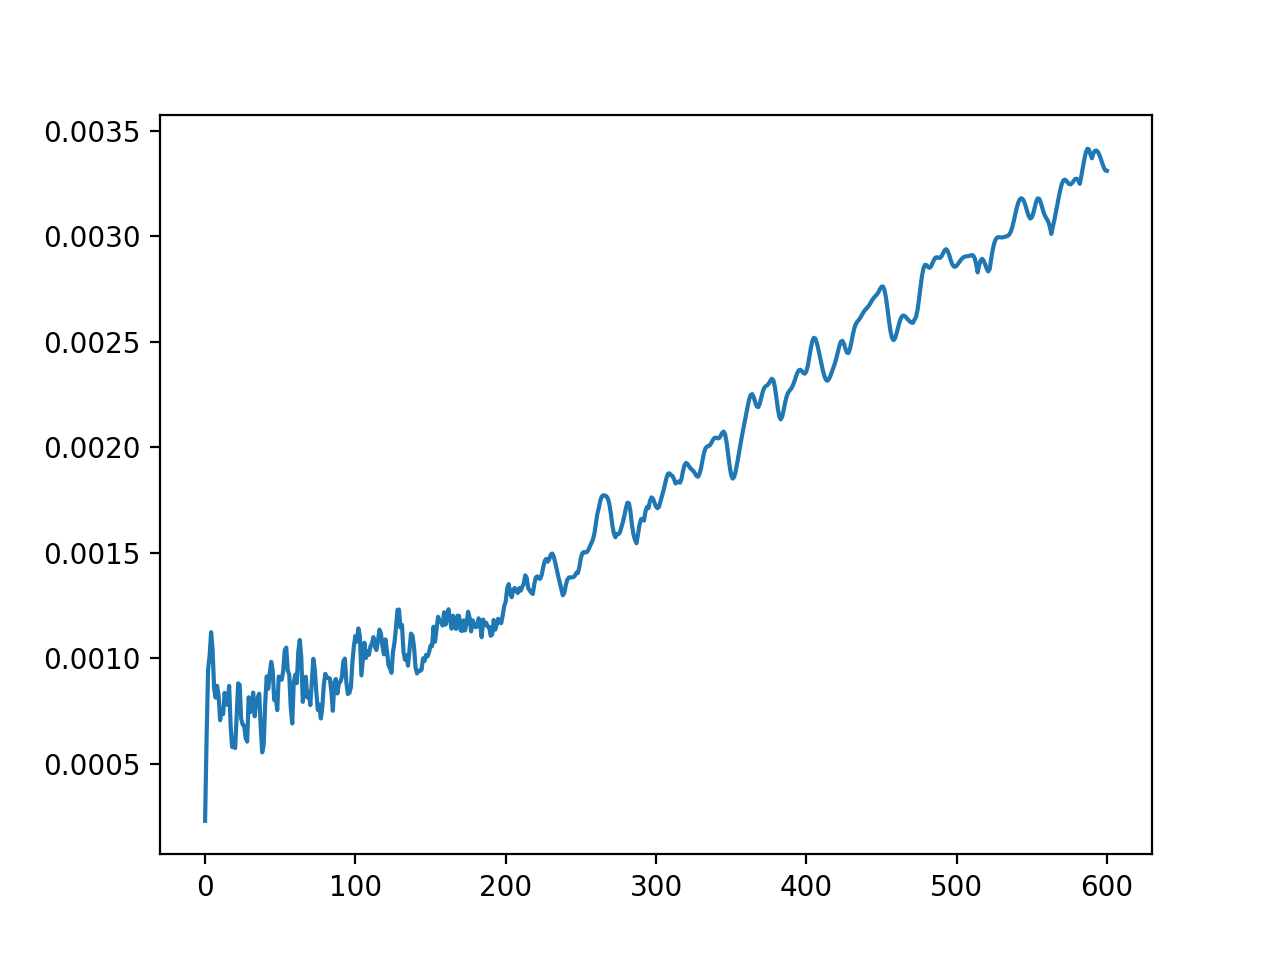

In [75]:
from vecmath import calc_c_norm, calc_l2_norm
import matplotlib.pyplot as plt

h_err_list21 = [state21.h - states_list21[0].h for state21 in states_list21[1:]]
u_err_list21 = [state21.u - states_list21[0].u for state21 in states_list21[1:]]
v_err_list21 = [state21.v - states_list21[0].v for state21 in states_list21[1:]]
c_norm = [calc_c_norm(h, domains) / calc_c_norm(states_list21[0].h, domains) for h in h_err_list21]
l2_norm = [calc_l2_norm(h, domains) / calc_l2_norm(states_list21[0].h, domains) for h in h_err_list21]

fig, ax = plt.subplots()
ax.plot(c_norm)
plt.show()

<IPython.core.display.Javascript object>


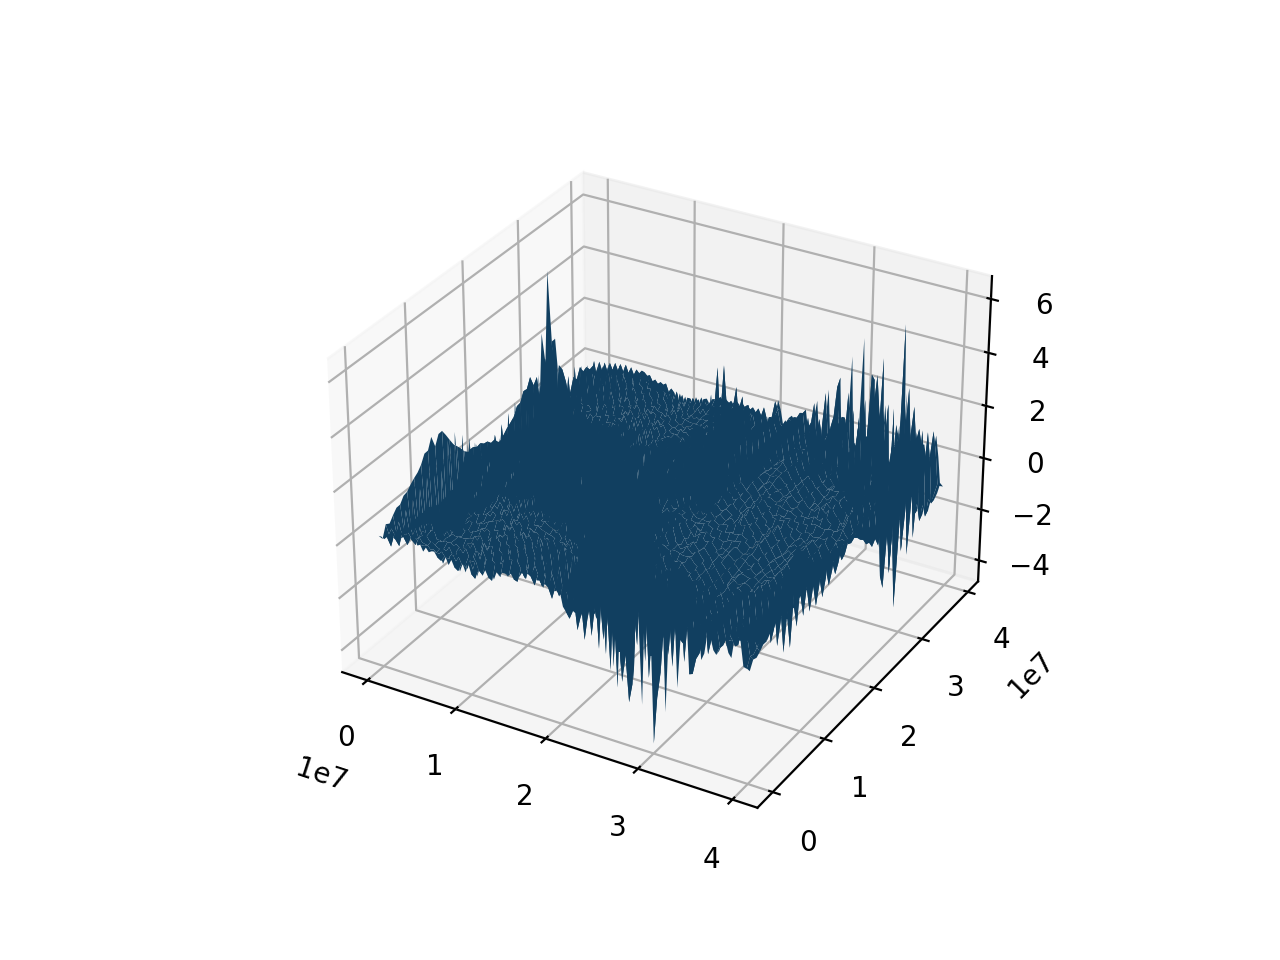

In [21]:
surf_interpolated_field(states_list42[-1].h - states_list42[0].h, domains)
plt.savefig('./imag/sbp42_geostrophic_balance_32x64_64x64.png')

<IPython.core.display.Javascript object>


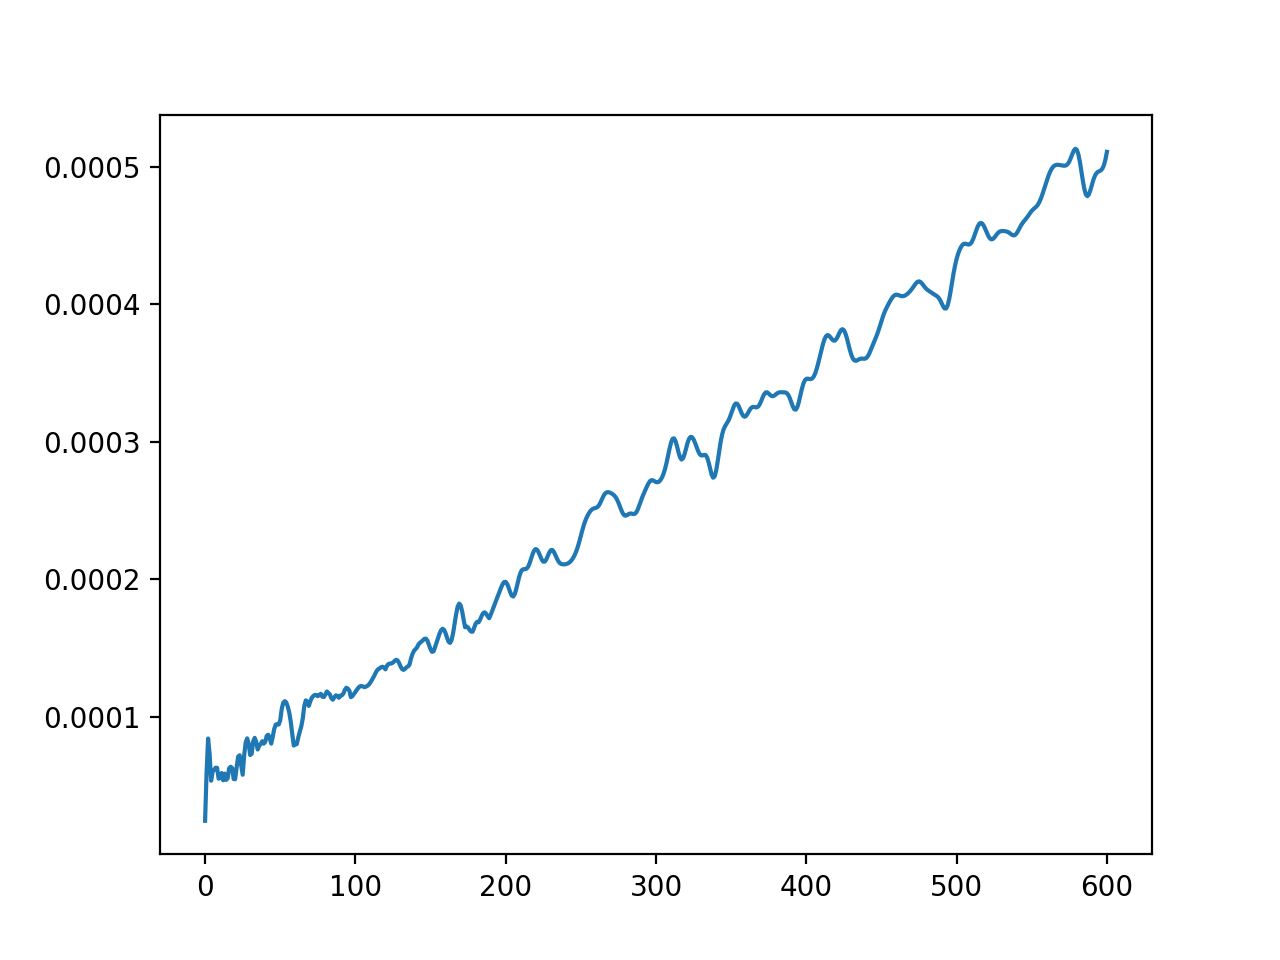

In [77]:
from vecmath import calc_c_norm, calc_l2_norm
import matplotlib.pyplot as plt

h_err_list42 = [state42.h - states_list42[0].h for state42 in states_list42[1:]]
u_err_list42 = [state42.u - states_list42[0].u for state42 in states_list42[1:]]
v_err_list42 = [state42.v - states_list42[0].v for state42 in states_list42[1:]]
c_norm = [calc_c_norm(h, domains) / calc_c_norm(states_list42[0].h, domains) for h in h_err_list42]
l2_norm = [calc_l2_norm(h, domains) / calc_l2_norm(states_list42[0].h, domains) for h in h_err_list42]

fig, ax = plt.subplots()
ax.plot(c_norm)
plt.show()

------
### cгущаем сетку в 2 раза

In [78]:
%%time
import time
from IPython.display import display, clear_output

domains = [Domain(xs = 0.0,    xe = LX / 2, nx = 64 * 2, ys = 0.0, ye = LY, ny = 128,  lx=LX, ly=LY), \
           Domain(xs = LX / 2, xe = LX    , nx = 64, ys = 0.0, ye = LY, ny = 128,  lx=LX, ly=LY)]

state21 = geostrophic_balance(domains, pcori=PCORI, g=GRAV, h_mean=H_MEAN)
state42 = geostrophic_balance(domains, pcori=PCORI, g=GRAV, h_mean=H_MEAN)
swe_operator21 = SweVecInvFormOperator(g=GRAV, pcori=PCORI, diff_method = op.diff_sbp21)
swe_operator42 = SweVecInvFormOperator(g=GRAV, pcori=PCORI, diff_method = op.diff_sbp42)

T = 5 * 24 * 3600
Nt = 8 * 150
dt = T / Nt

states_list21 = [state21]
states_list42 = [state42]

for k in range(Nt+1):
    clear_output(wait=True)
    display('Time step '+str(k))
    state21 = rk4(state21, swe_operator21, dt, domains)
    state42 = rk4(state42, swe_operator42, dt, domains)
    states_list21.append(state21)
    states_list42.append(state42)
h_list21 = [state21.h for state21 in states_list21]
h_list42 = [state42.h for state42 in states_list42]

'Time step 1200'

CPU times: user 1min 27s, sys: 9.62 s, total: 1min 37s
Wall time: 1min 37s


<IPython.core.display.Javascript object>


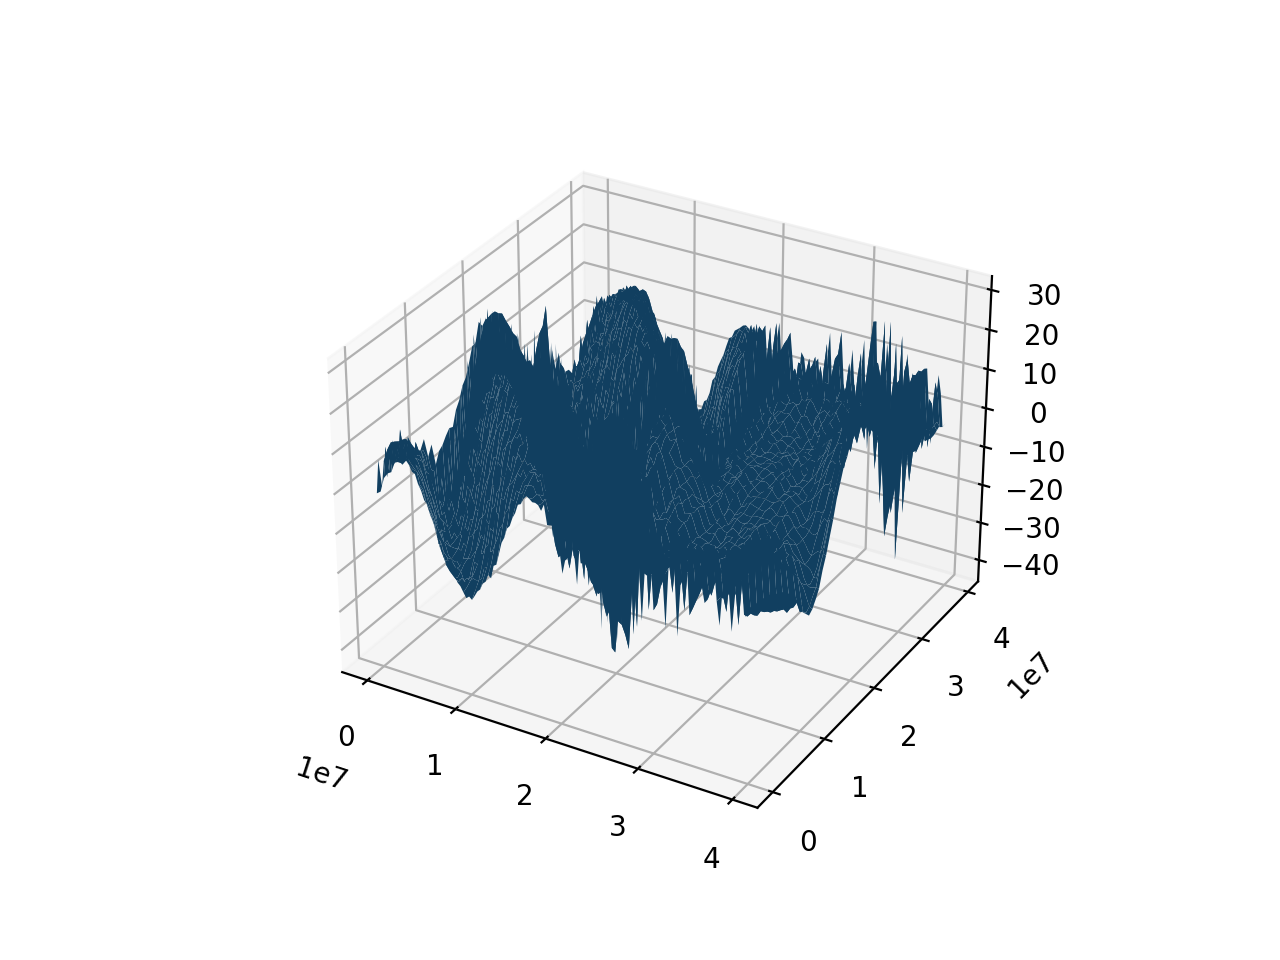

In [22]:
surf_interpolated_field(states_list21[-1].h - states_list21[0].h, domains)
plt.savefig('./imag/sbp21_geostrophic_balance_64x128_128x128.png')

<IPython.core.display.Javascript object>


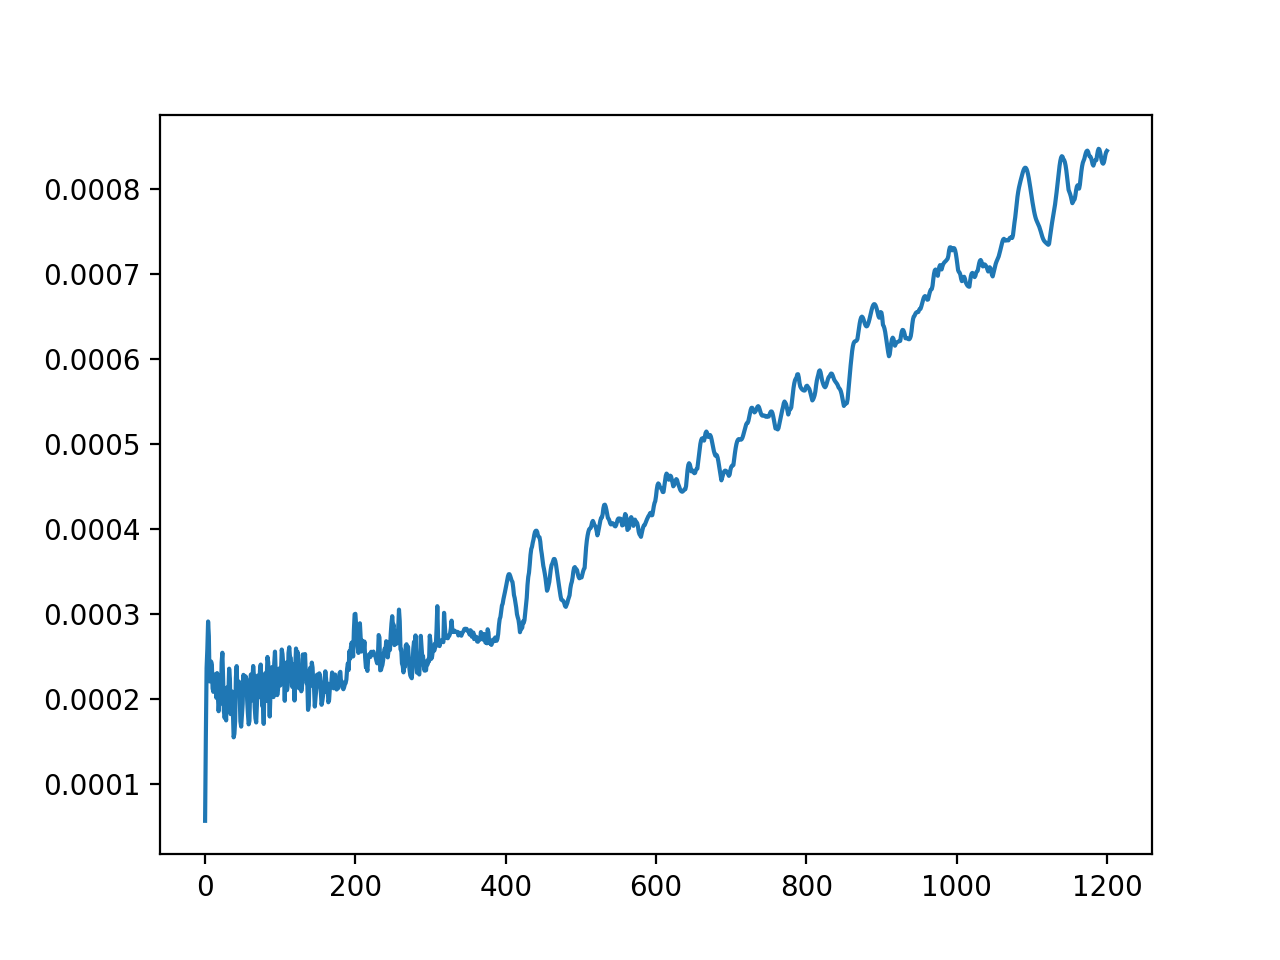

In [80]:
from vecmath import calc_c_norm, calc_l2_norm
import matplotlib.pyplot as plt

h_err_list21 = [state21.h - states_list21[0].h for state21 in states_list21[1:]]
u_err_list21 = [state21.u - states_list21[0].u for state21 in states_list21[1:]]
v_err_list21 = [state21.v - states_list21[0].v for state21 in states_list21[1:]]
c_norm = [calc_c_norm(h, domains) / calc_c_norm(states_list21[0].h, domains) for h in h_err_list21]
l2_norm = [calc_l2_norm(h, domains) / calc_l2_norm(states_list21[0].h, domains) for h in h_err_list21]

fig, ax = plt.subplots()
ax.plot(c_norm)
plt.show()

<IPython.core.display.Javascript object>


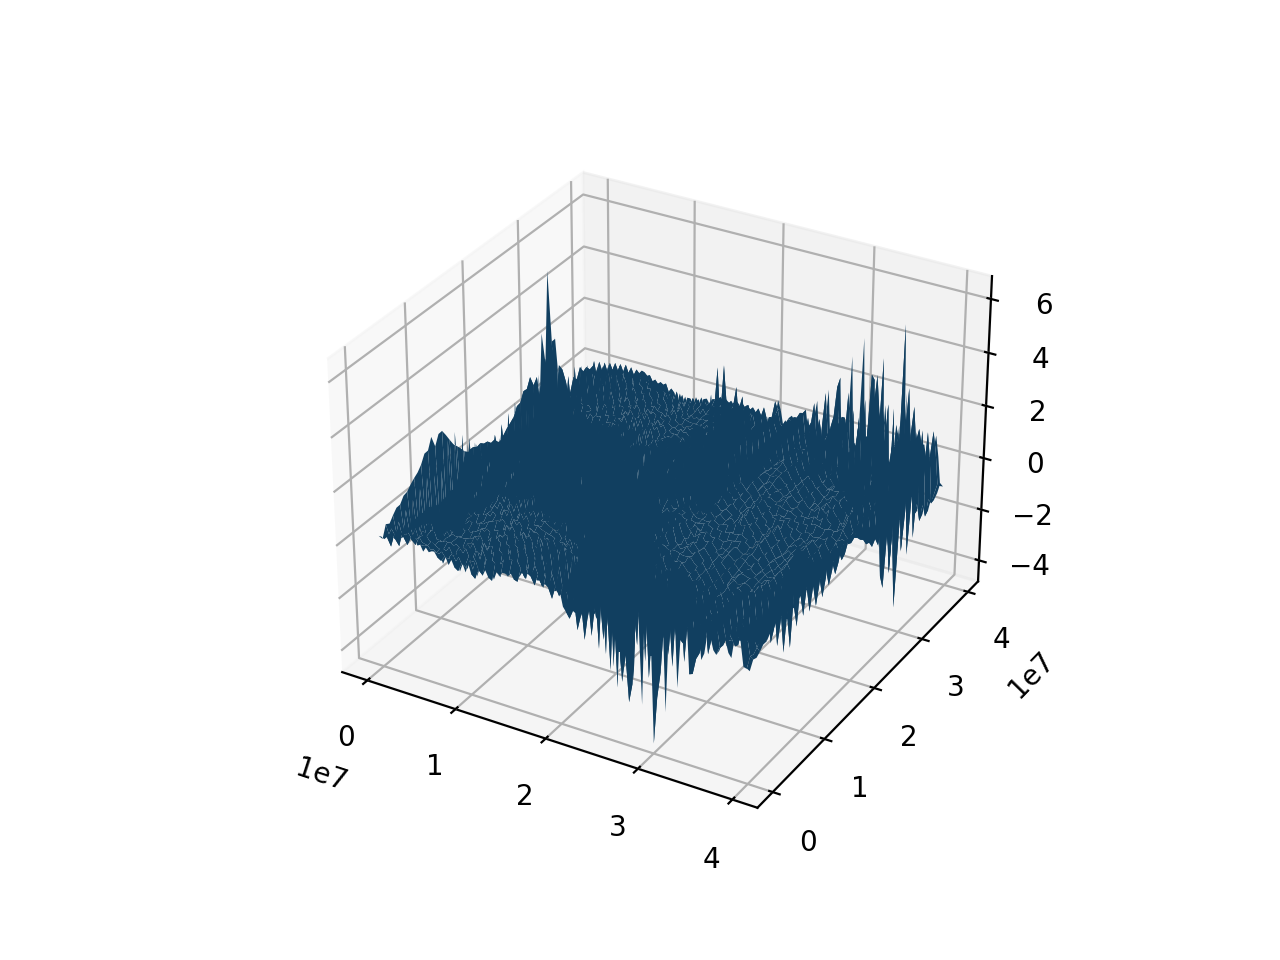

In [23]:
surf_interpolated_field(states_list42[-1].h - states_list42[0].h, domains)
plt.savefig('./imag/sbp42_geostrophic_balance_64x128_128x128.png')

<IPython.core.display.Javascript object>


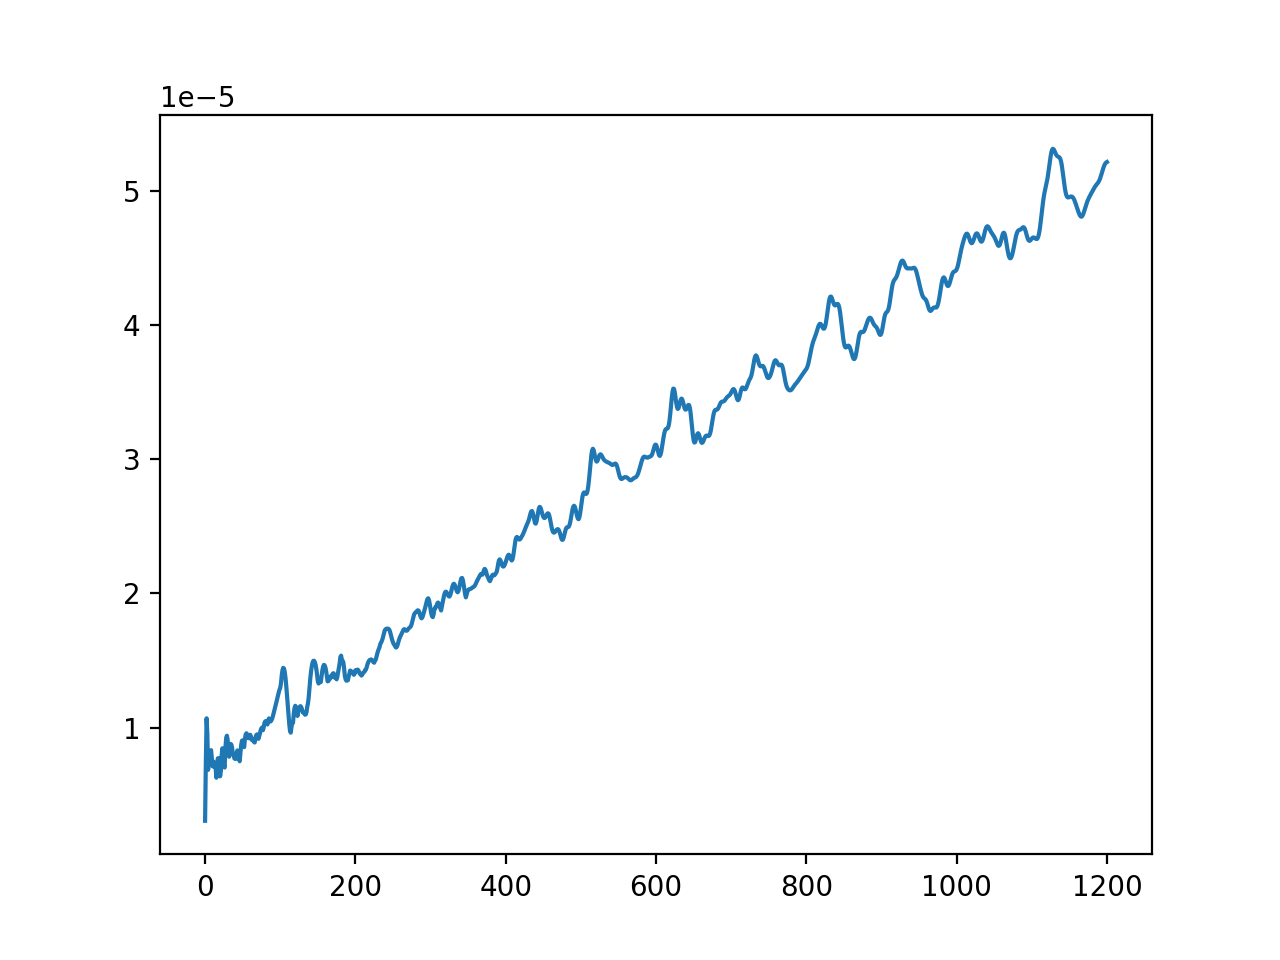

In [82]:
from vecmath import calc_c_norm, calc_l2_norm
import matplotlib.pyplot as plt

h_err_list42 = [state42.h - states_list42[0].h for state42 in states_list42[1:]]
u_err_list42 = [state42.u - states_list42[0].u for state42 in states_list42[1:]]
v_err_list42 = [state42.v - states_list42[0].v for state42 in states_list42[1:]]
c_norm = [calc_c_norm(h, domains) / calc_c_norm(states_list42[0].h, domains) for h in h_err_list42]
l2_norm = [calc_l2_norm(h, domains) / calc_l2_norm(states_list42[0].h, domains) for h in h_err_list42]

fig, ax = plt.subplots()
ax.plot(c_norm)
plt.show()

-----
### График сходимости

In [11]:
%%time
import time
from IPython.display import display, clear_output
P = 4

h_array      = np.zeros(P)
l2error21   = np.zeros(P)
cerror21 = np.zeros(P)
l2error42   = np.zeros(P)
cerror42 = np.zeros(P)

for p in range(P):
    domains = [Domain(xs = 0.0,    xe = LX / 2, nx = 32 * 2 * (p + 1), ys = 0.0, ye = LY, ny = 64 * (p + 1),  lx=LX, ly=LY), \
           Domain(xs = LX / 2, xe = LX    , nx = 32 * (p + 1), ys = 0.0, ye = LY, ny = 64 * (p + 1),  lx=LX, ly=LY)]

    state21 = geostrophic_balance(domains, pcori=PCORI, g=GRAV, h_mean=H_MEAN)
    state42 = geostrophic_balance(domains, pcori=PCORI, g=GRAV, h_mean=H_MEAN)
    swe_operator21 = SweVecInvFormOperator(g=GRAV, pcori=PCORI, diff_method = op.diff_sbp21)
    swe_operator42 = SweVecInvFormOperator(g=GRAV, pcori=PCORI, diff_method = op.diff_sbp42)

    T = 5 * 24 * 3600
    Nt = 4 * 150 * (p + 1)
    dt = T / Nt

    states_list21 = [state21]
    states_list42 = [state42]

    for k in range(Nt+1):
        clear_output(wait=True)
        display('Time step '+str(k))
        state21 = rk4(state21, swe_operator21, dt, domains)
        state42 = rk4(state42, swe_operator42, dt, domains)
        states_list21.append(state21)
        states_list42.append(state42)
    error21 = states_list21[-1].h - states_list21[0].h
    error42 = states_list42[-1].h - states_list42[0].h
    
    l2error21[p] = calc_l2_norm(error21, domains)
    l2error42[p] = calc_l2_norm(error42, domains)
    cerror21[p]  = calc_c_norm(error21, domains)
    cerror42[p]  = calc_c_norm(error42, domains)
    h_array[p]   = LX / (32 * (p + 1))

'Time step 2400'

CPU times: user 12min 7s, sys: 43.6 s, total: 12min 51s
Wall time: 12min 47s


<IPython.core.display.Javascript object>


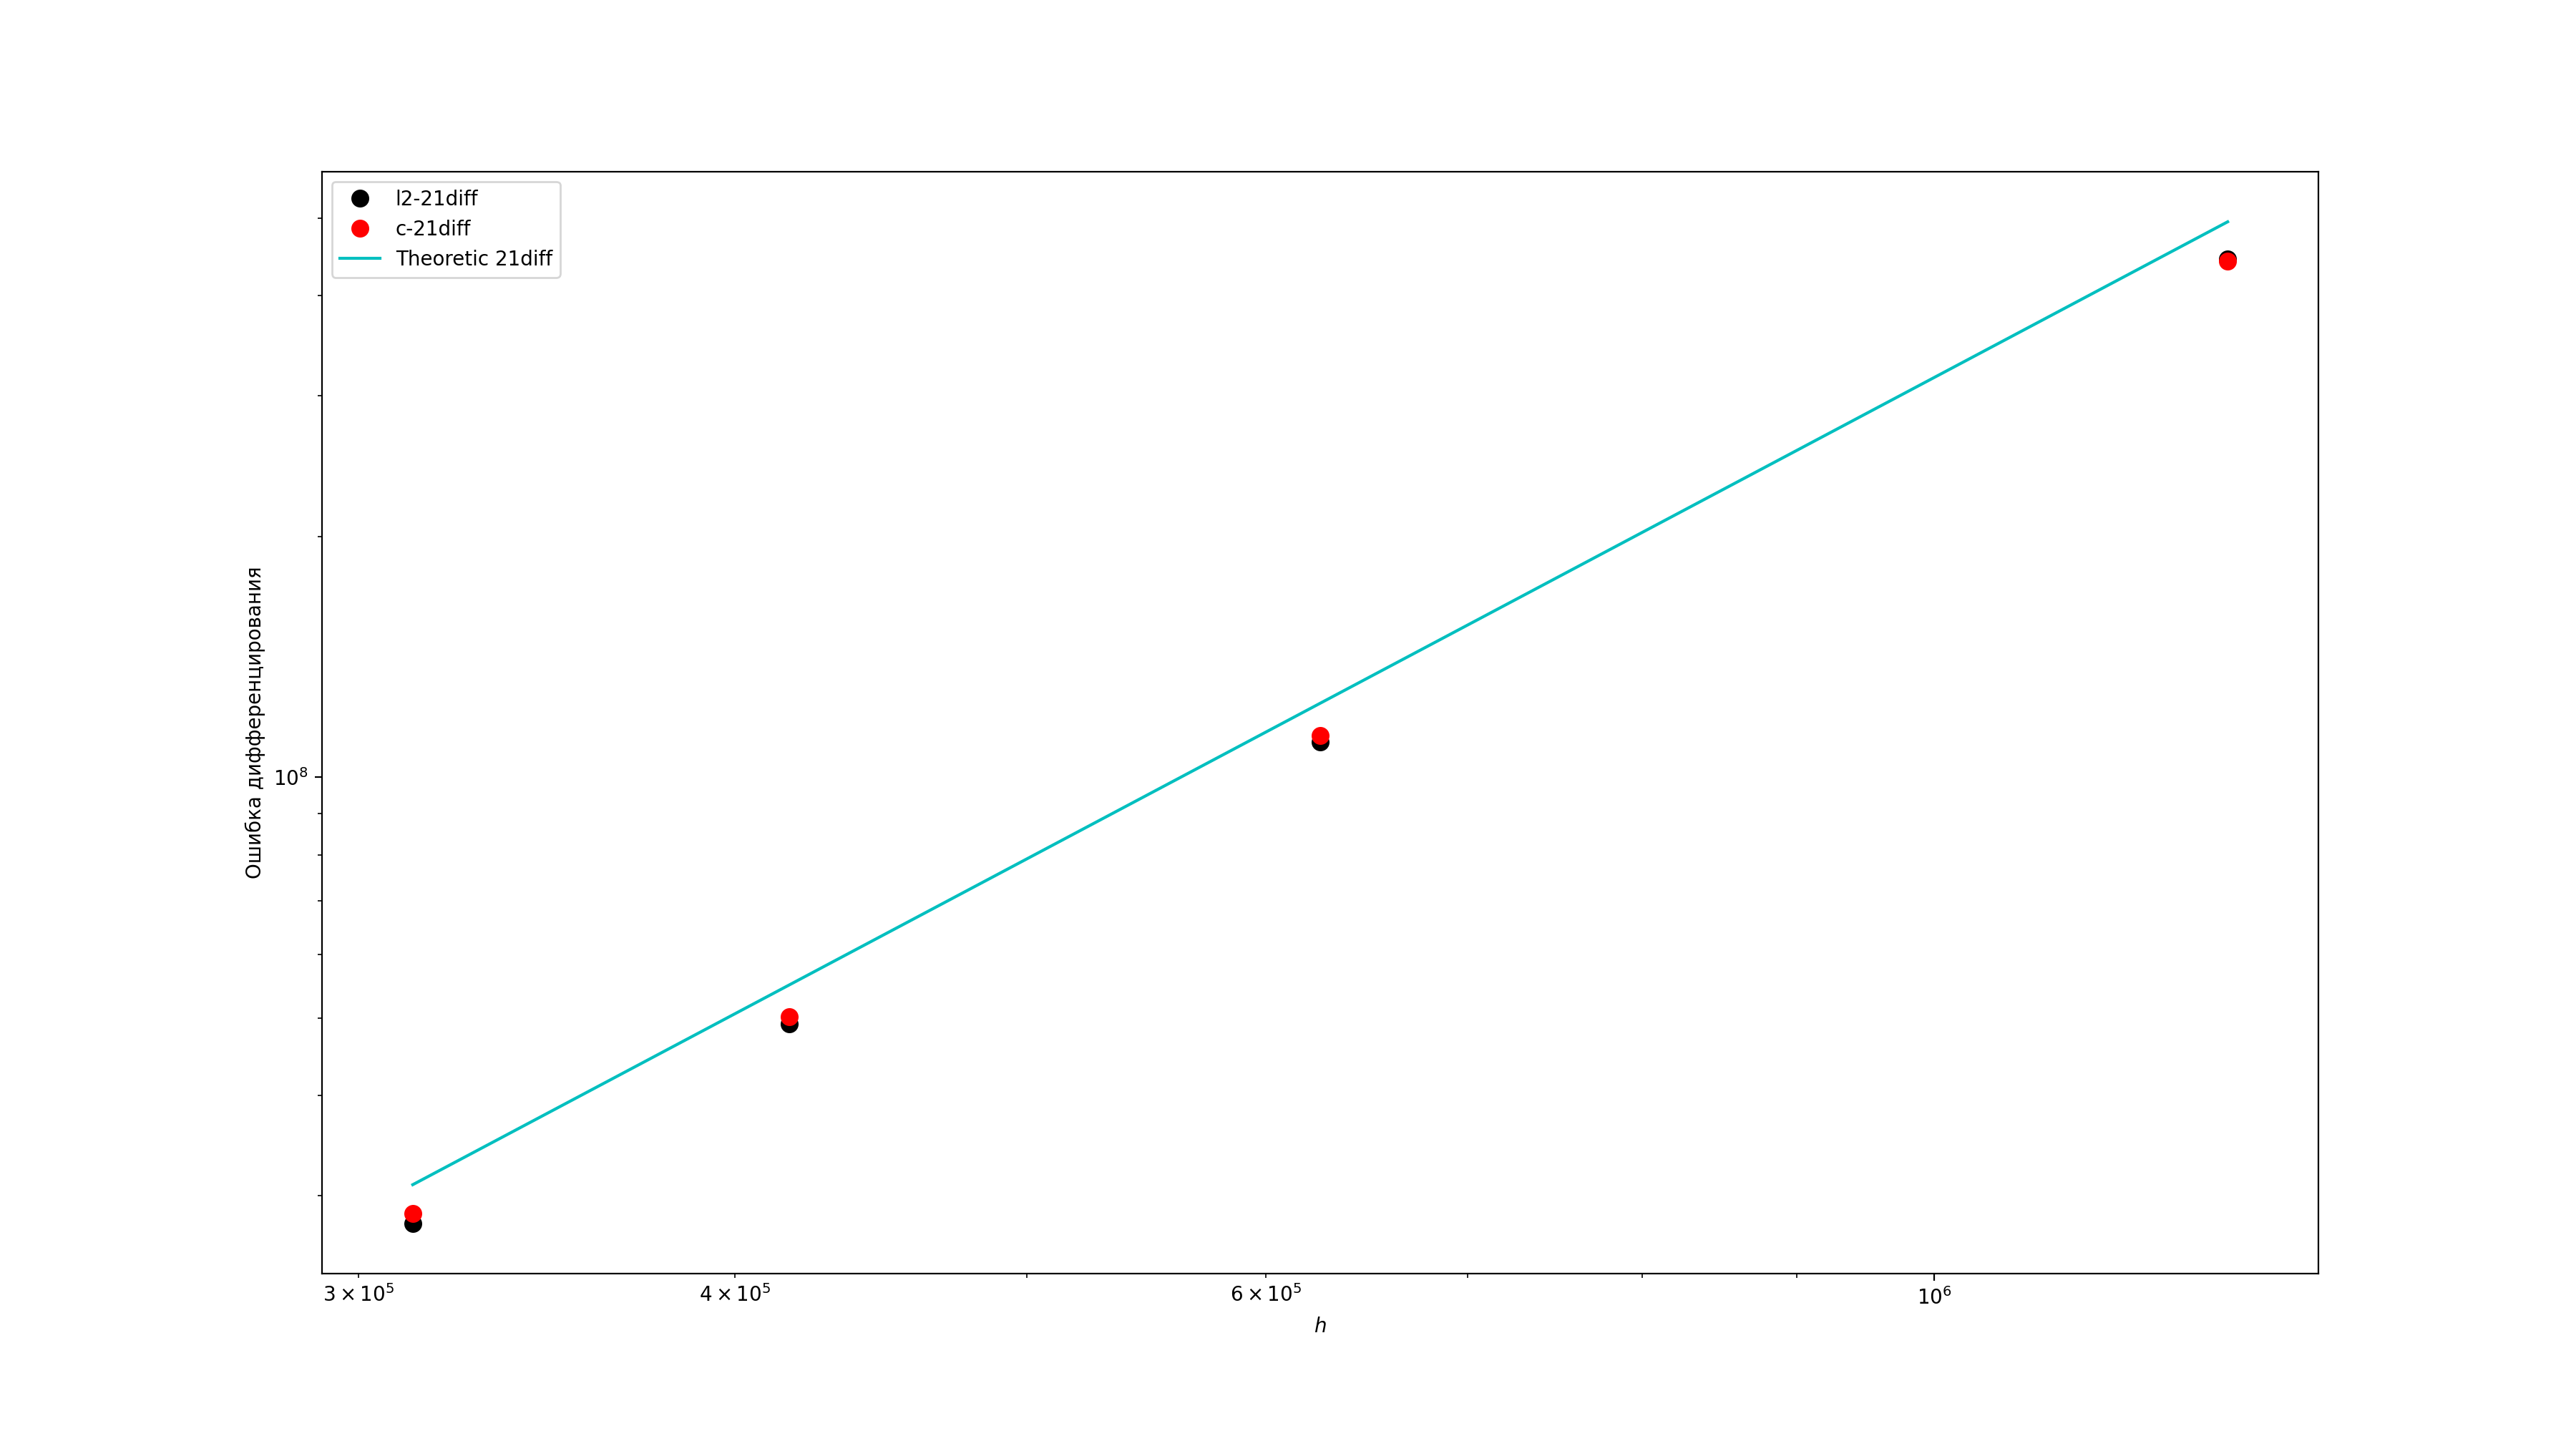

In [14]:
plt.figure(figsize=(18, 10))
plt.loglog(h_array, l2error21, 'k.', ms=16, label='l2-21diff')
plt.loglog(h_array, 10**7*cerror21, 'r.', ms=16, label='c-21diff')
plt.loglog(h_array, 10**(-3.5)*h_array**2, 'c-', ms=16, label='Theoretic 21diff')

plt.xlabel('$h$')
plt.ylabel('Ошибка дифференцирования')
plt.legend()

plt.savefig('./imag/sbp21_x2left_power.png')
plt.show()

<IPython.core.display.Javascript object>


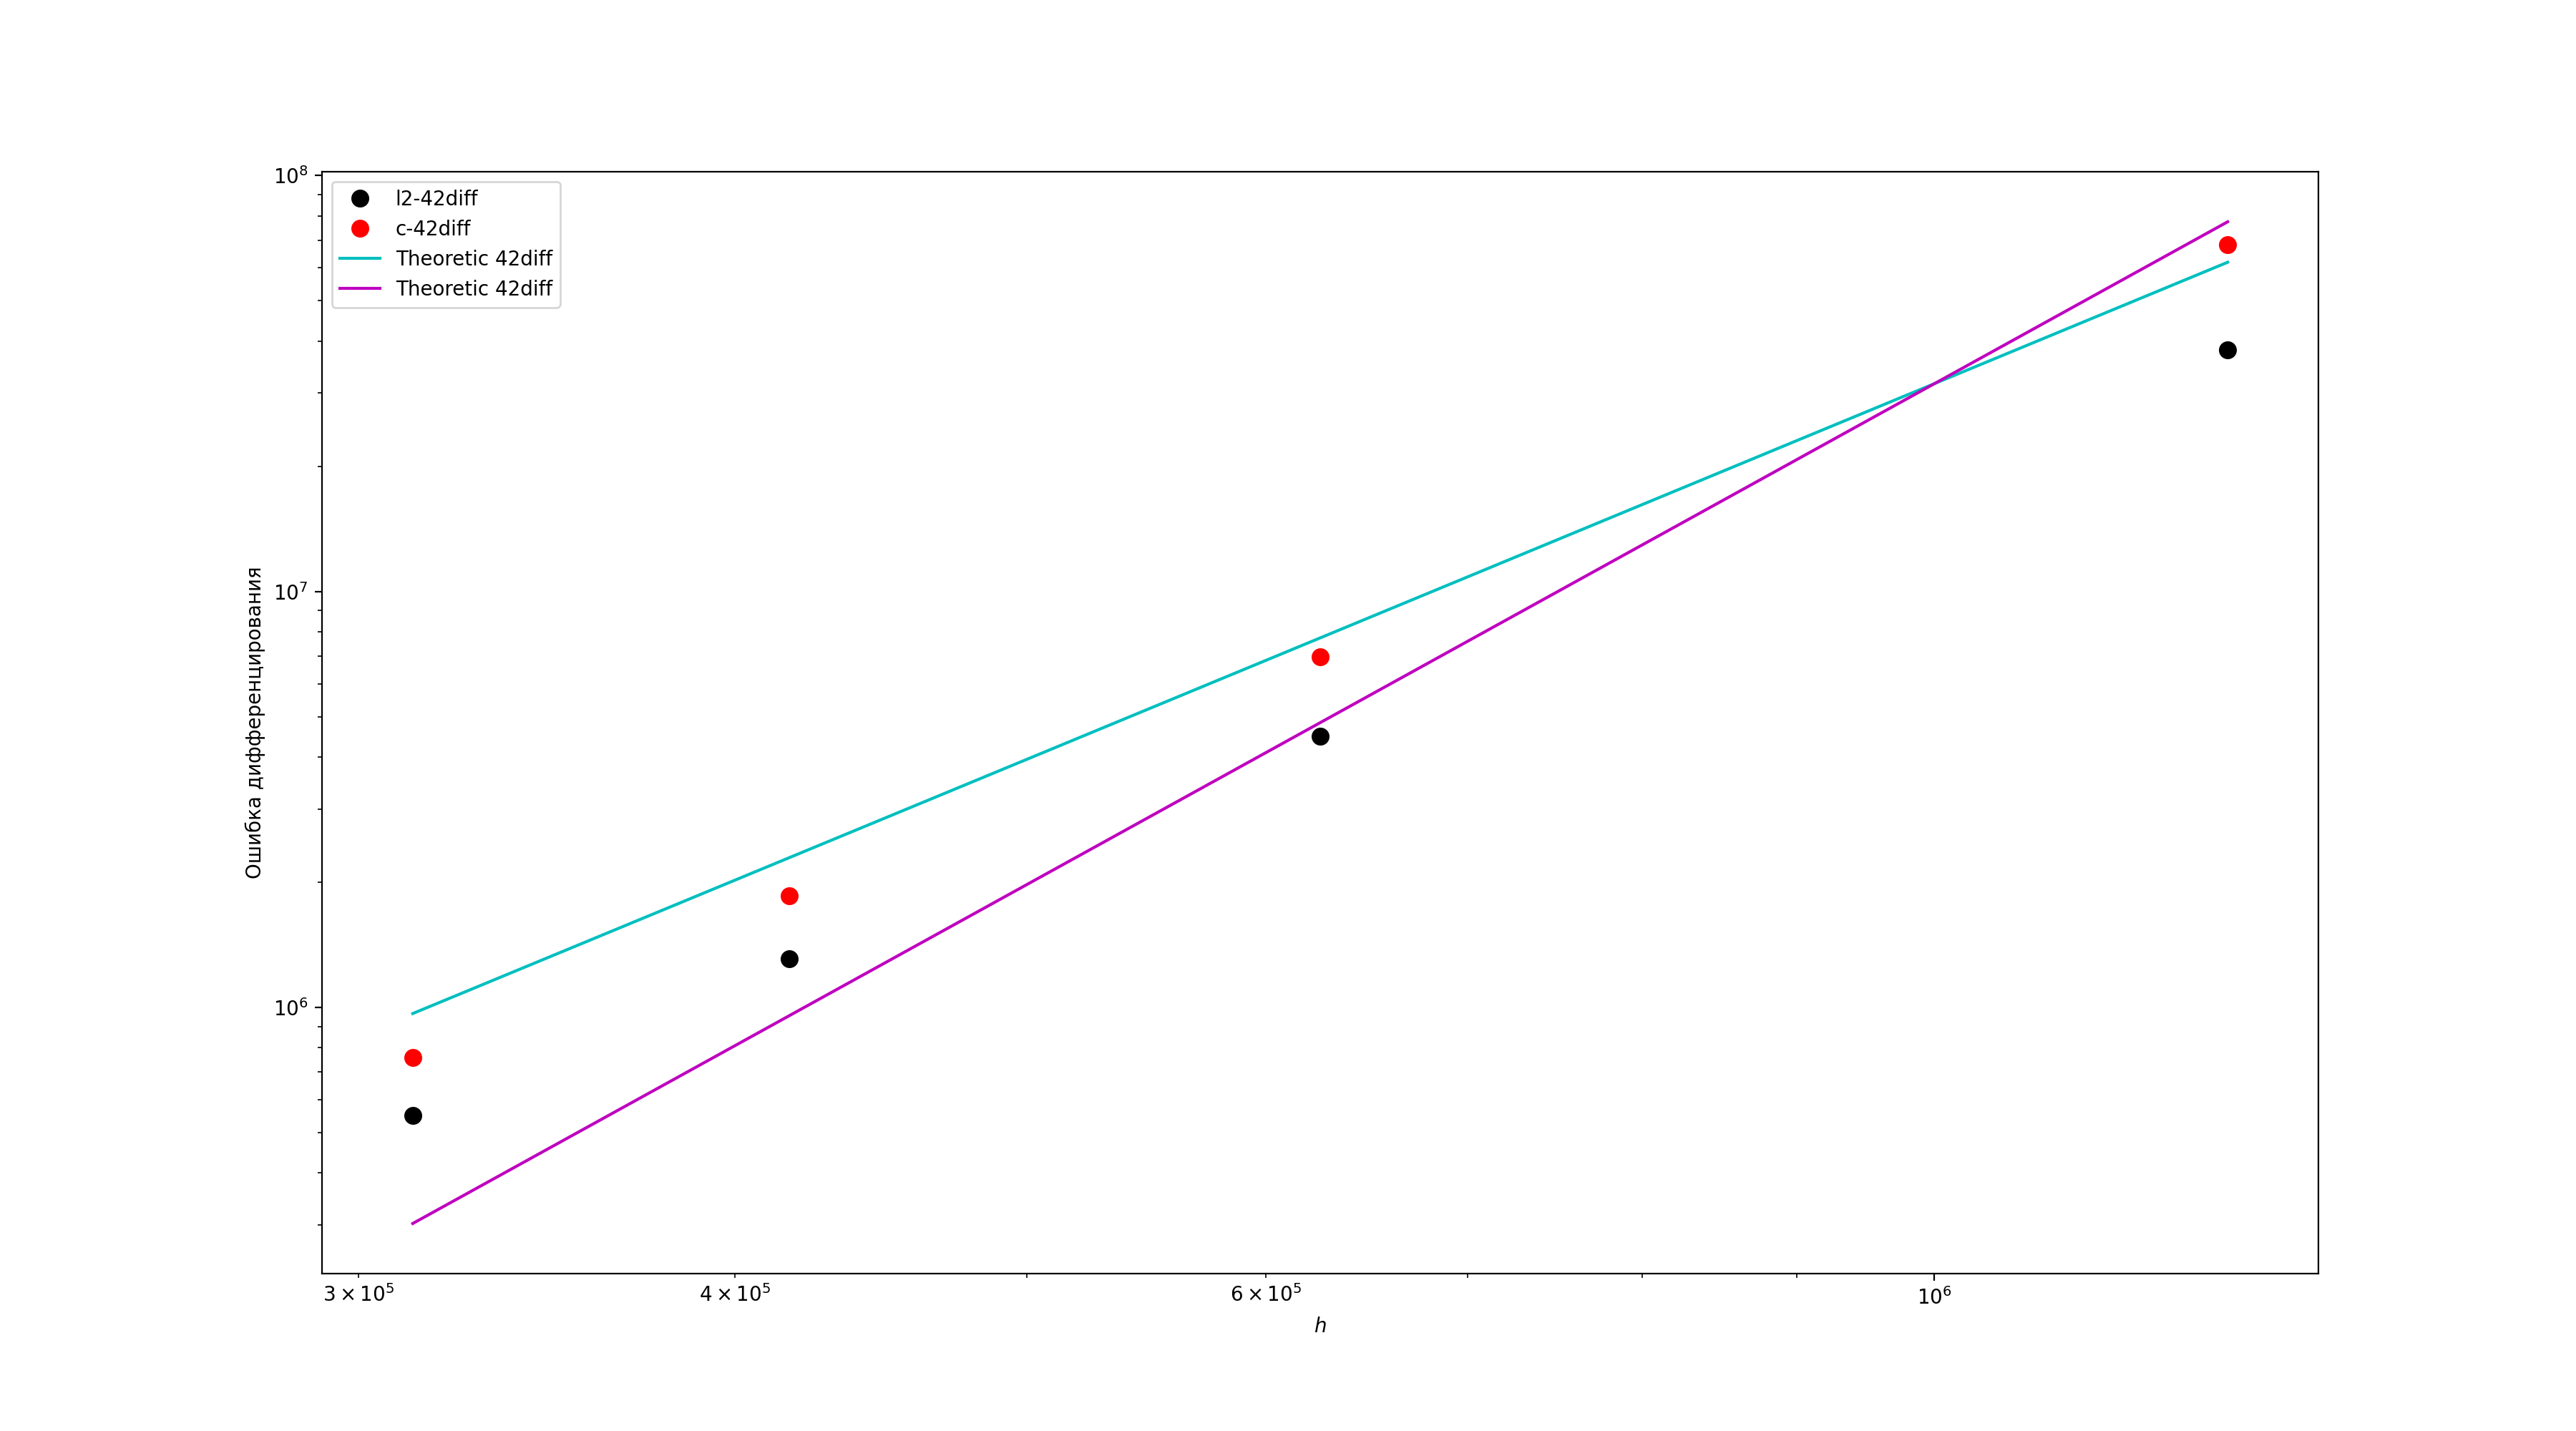

In [15]:
plt.figure(figsize=(18, 10))
plt.loglog(h_array, l2error42, 'k.', ms=16, label='l2-42diff')
plt.loglog(h_array, 10**7*cerror42, 'r.', ms=16, label='c-42diff')
plt.loglog(h_array, 10**(-10.5)*h_array**(3), 'c-', ms=16, label='Theoretic 42diff')
plt.loglog(h_array, 10**(-16.5)*h_array**(4), 'm-', ms=16, label='Theoretic 42diff')

plt.xlabel('$h$')
plt.ylabel('Ошибка дифференцирования')
plt.legend()

plt.savefig('./imag/sbp42_x2left_power.png')
plt.show()

### С включенной диффузией:

In [7]:
from diffusion import DiffusionOperator, diff2_sbp21

In [13]:
%%time
import time
from IPython.display import display, clear_output

domains = [Domain(xs = 0.0,    xe = LX / 2, nx = 32 * 2, ys = 0.0, ye = LY, ny = 64,  lx=LX, ly=LY), \
           Domain(xs = LX / 2, xe = LX    , nx = 32, ys = 0.0, ye = LY, ny = 64,  lx=LX, ly=LY)]

state21 = geostrophic_balance(domains, pcori=PCORI, g=GRAV, h_mean=H_MEAN)
state42 = geostrophic_balance(domains, pcori=PCORI, g=GRAV, h_mean=H_MEAN)
swe_operator21 = SweVecInvFormOperator(g=GRAV, pcori=PCORI, diff_method = op.diff_sbp21)
swe_operator42 = SweVecInvFormOperator(g=GRAV, pcori=PCORI, diff_method = op.diff_sbp42)

T = 5 * 24 * 3600
Nt = 4 * 150
dt = T / Nt

diff_coeffs = [domains[0].dx ** 2 / dt, domains[0].dx ** 2 / dt]
diff = DiffusionOperator(diff_coeffs, diff2_method = diff2_sbp21)

states_list21 = [state21]
states_list42 = [state42]

for k in range(Nt+1):
    clear_output(wait=True)
    display('Time step '+str(k))
    state21 = rk4(state21, swe_operator21, dt, domains)
    state21 = explicit_euler(state21, diff, dt, domains)
    state42 = rk4(state42, swe_operator42, dt, domains)
    state42 = explicit_euler(state42, diff, dt, domains)
    states_list21.append(state21)
    states_list42.append(state42)
h_list21 = [state21.h for state21 in states_list21]
h_list42 = [state42.h for state42 in states_list42]

'Time step 600'

CPU times: user 27.3 s, sys: 1.79 s, total: 29.1 s
Wall time: 28.4 s


<IPython.core.display.Javascript object>


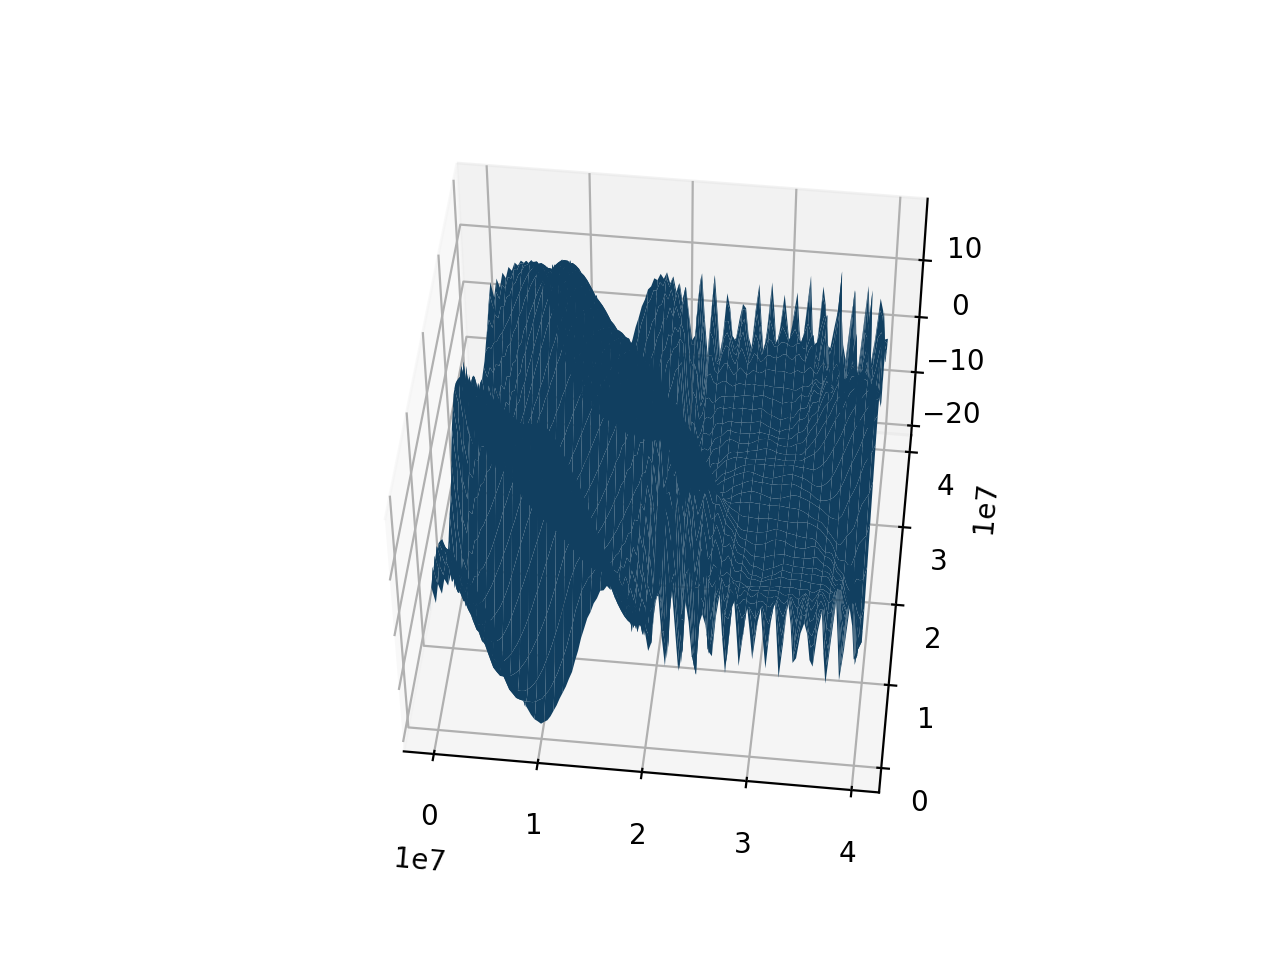

In [20]:
surf_interpolated_field(states_list21[-100].h - states_list21[0].h, domains)

<IPython.core.display.Javascript object>


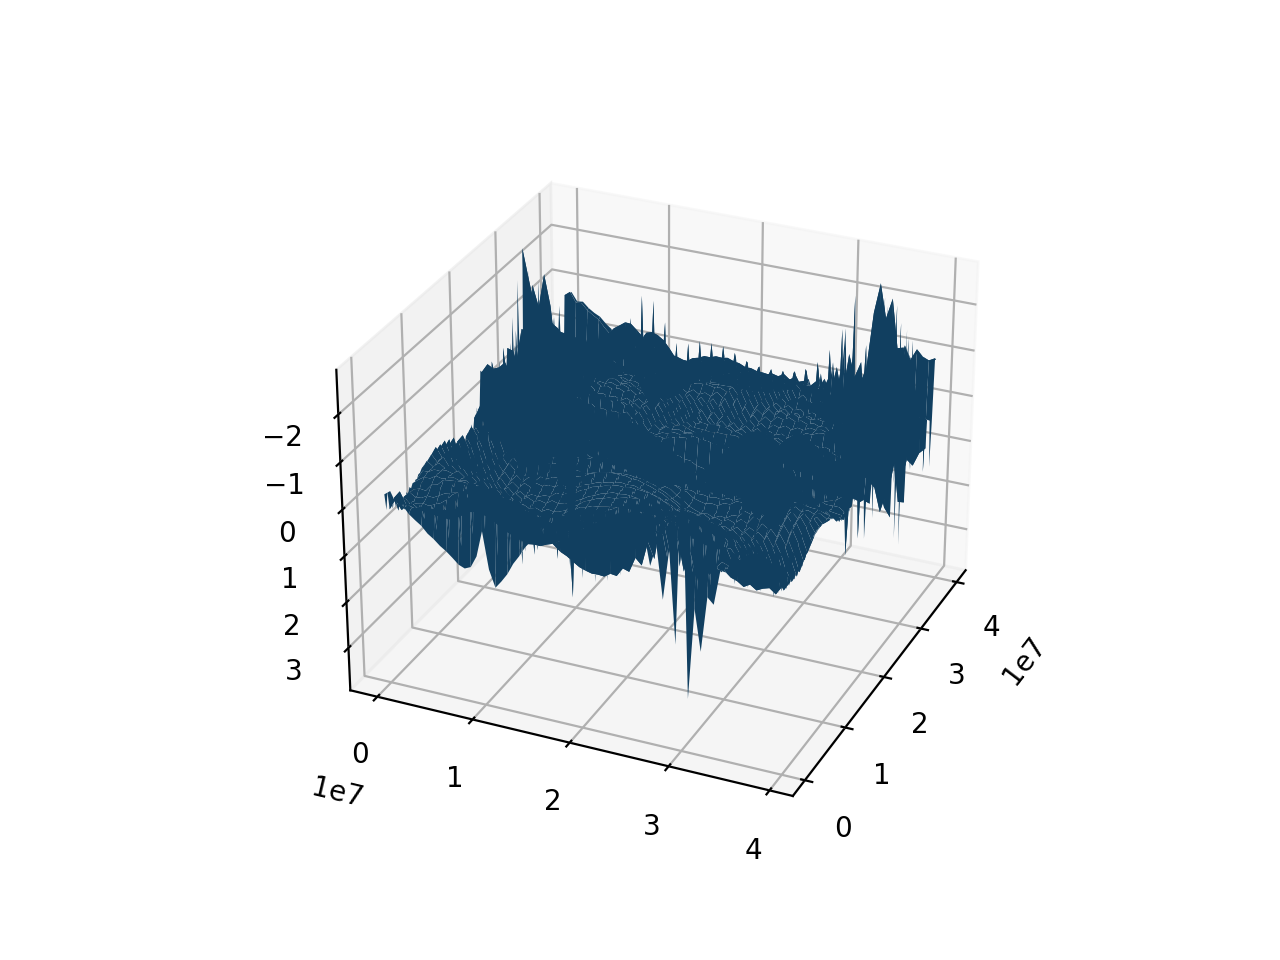

In [17]:
surf_interpolated_field(states_list42[-1].h - states_list42[0].h, domains)